In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json('../../meme_scraper/data/fabryka-memow-pl.json')
df.template = df.template.fillna('Brak')
df.loc[df.template == '', 'template'] = 'Brak'
df.head()

author            datetime  \
0  anonymous 2018-09-14 14:36:56   
1  anonymous 2018-09-05 14:23:04   
2  anonymous 2018-09-05 23:36:25   
3  anonymous 2018-09-07 15:27:32   
4      ciriw 2018-09-10 09:23:31   

                                             img_alt  \
0  PAnie, jak nim Pod klub podjechałem to Didżej ...   
1  śmiali się ze mnie gdy rozbijałem namiot ja śm...   
2  jeżeli gwałt jest wystarczającym powodem do  z...   
3  Na jak bardzo zjaranego wyglądam w skali od sz...   
4                                 i&#039;m ciri now!   

                                             img_url            template  \
0  /uimages/services/fabrykamemow/i18n/pl_PL/2018...                Brak   
1  /uimages/services/fabrykamemow/i18n/pl_PL/2018...  Mściwy Klarnecista   
2  /uimages/services/fabrykamemow/i18n/pl_PL/2018...        Filozoraptor   
3  /uimages/services/fabrykamemow/i18n/pl_PL/2018...     Zjarany Zbyszek   
4  /uimages/services/fabrykamemow/i18n/pl_PL/2018...                Brak   

                                                 url  votes  
0    /memy/441496/PAnie-jak-nim-Pod-klub-podjechalem      2  
1  /memy/441197/smiali-sie-ze-mnie-gdy-rozbijalem...      2  
2  /memy/441223/Jezeli-gwalt-jest-wystarczajacym-...      3  
3      /memy/441270/Na-jak-bardzo-zjaranego-wygladam      1  
4                        /memy/441350/I039m-ciri-now      1

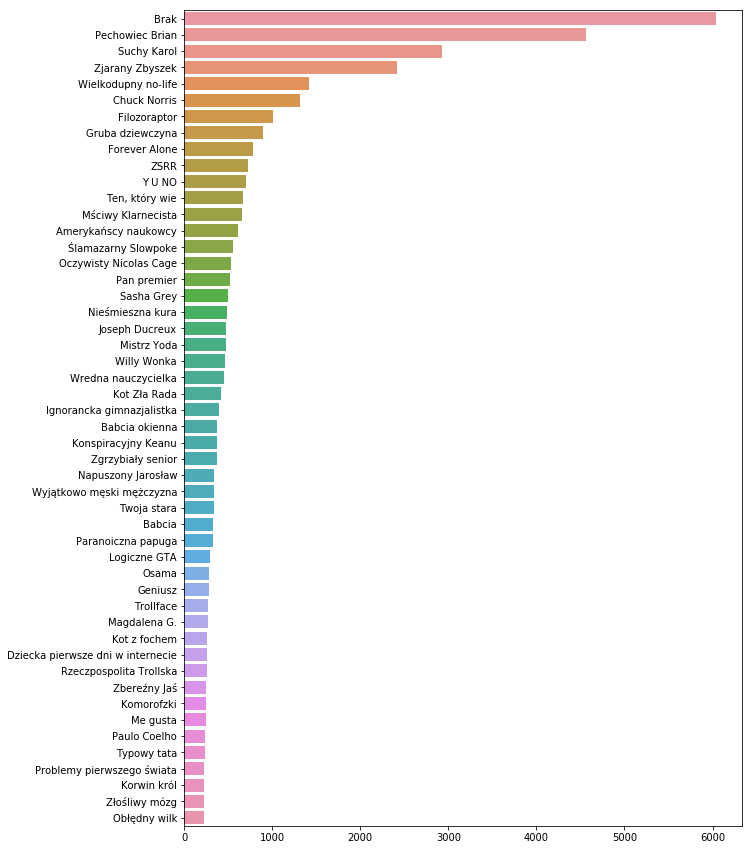

In [3]:
N = 50
value_counts = df.template.value_counts()
top_n = value_counts[:N]

plt.figure(figsize=(10, 15))
sns.barplot(y=top_n.index, x=top_n.values)

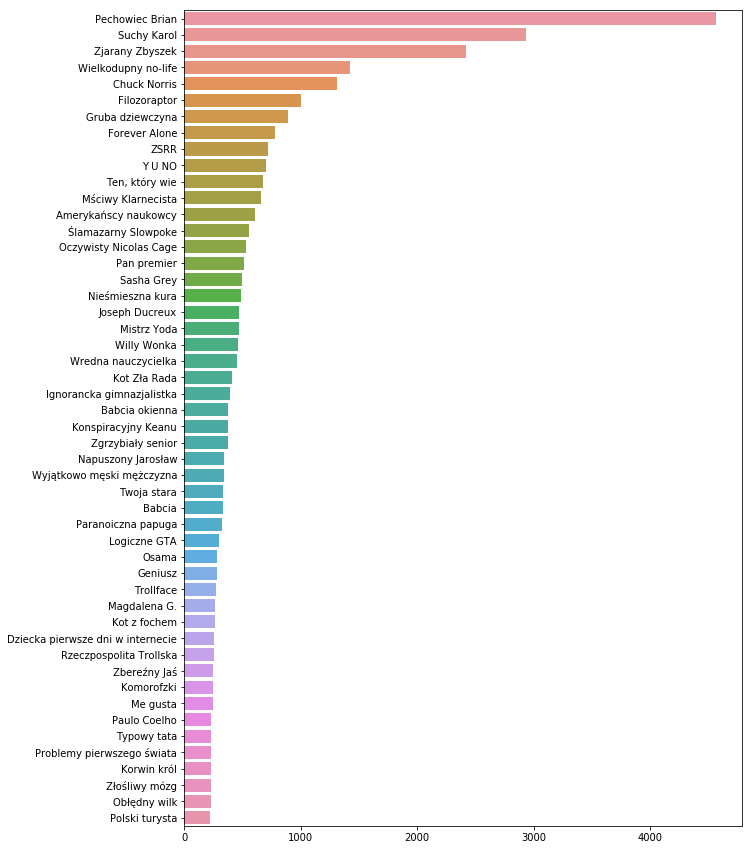

In [4]:
plt.figure(figsize=(10, 15))

top_n = value_counts[1:N+1]
sns.barplot(y=top_n.index, x=top_n.values)

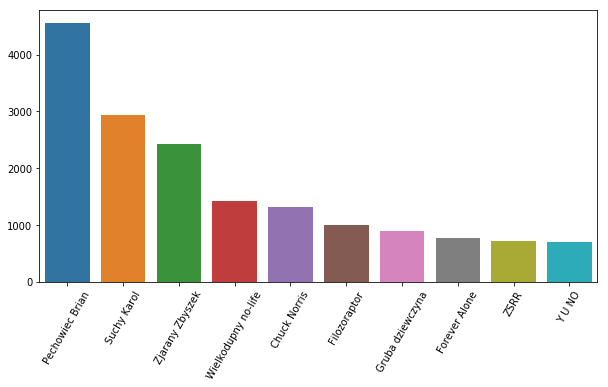

In [5]:
plt.figure(figsize=(10, 5))

top_n = value_counts[1:11]
ax = sns.barplot(y=top_n.values, x=top_n.index)
_ = ax.set_xticklabels(top_n.index, rotation=60)

In [6]:
popular_memes_sentences = df[df.template.isin(top_n.index)].img_alt. \
                                                        map(lambda x: x.lower().split())
words = []
for sentence in popular_memes_sentences:
    words.extend(sentence)
    
from collections import Counter

counter = Counter(words)
counter

Counter({'stanie?': 1,
         'wydoili': 1,
         'ojczyzna': 1,
         'bezbarwna': 1,
         'u.s.a.,': 1,
         'rozbili': 1,
         'simsach': 10,
         'śniezki': 1,
         'curwa,': 1,
         'zasięg': 3,
         'widzą': 4,
         'surowego': 1,
         'komputera!': 1,
         'czar': 1,
         'ci?': 1,
         'dziennie': 15,
         'kościele': 14,
         'goffy': 1,
         'imienia': 4,
         'oszustka': 1,
         'wsuwaj': 1,
         'różdzkę': 1,
         'opisać': 1,
         'stanęłam': 3,
         'wnusiu': 5,
         'taxi': 1,
         'fragmenty': 1,
         'excelu...': 1,
         'przodu': 9,
         'na*rwiał': 1,
         'niewola': 1,
         'schabowego': 4,
         'przecika': 1,
         'wołow': 1,
         'amenu': 1,
         'odrzut': 2,
         'średią': 1,
         'świeciły': 1,
         '-voldemorta': 1,
         'zaczną': 1,
         'mniejsze': 1,
         'domem?': 1,
         'jeżdżącym': 1,
        

In [7]:
word_counts = pd.DataFrame.from_dict(counter, orient='index').reset_index(). \
                           rename(columns={'index': 'word', 0: 'counts'}).sort_values(by='counts', ascending=False)
word_counts.head()

word  counts
5623     w    4309
18286   na    3268
24075  się    3149
4944   nie    2710
3883    to    2018

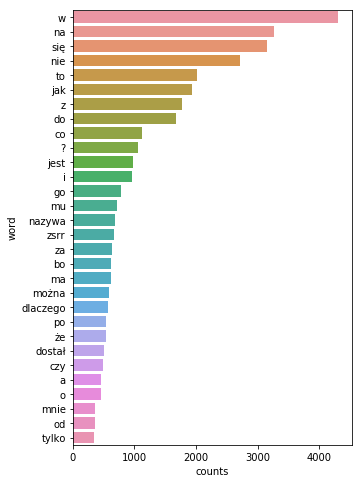

In [8]:
plt.figure(figsize=(5, 8))
sns.barplot(x='counts', y='word', data=word_counts[:30])